<a href="https://colab.research.google.com/github/imax990/Efosa-Dwave-Training/blob/main/Deutsch's_Algorithm_Pennylane_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Deutsch's Algorithm using Pennylane

##Background

Deutch's Algorithm is an important early quantum algorithm that demonstrates **quantum speedup**, a concept proposed by David Deutsch himself. Deustch proposed this search algorithm in **1985** as an edge case of the more complex Deutsch-Jozsa Algorithm. The Deutsch Algorithm addresses the following question:

*Given a function $f(x)$ that accepts an n-bit input and outputs either a 0 or a 1 (so $f(0,1) = \{0,1\}^n$), we know the function is either **constant** (outputs an even combination of 0 and 1) or **balanced** (always outputs 0 or 1). **How can we determine which type of function we have?***

In the **classical case**, the function would have to be surveyed deterministically, which would require **$2^{n-1}+1$ queries**!

Using the principles of **quantum computing**, we can solve the $n = 1$ case in **only 1 query!**

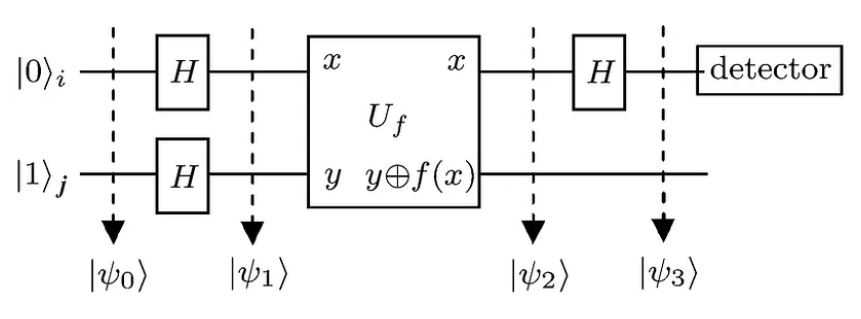

##Import Pennylane

Pennylane is a quantum software development kit (SDK) made and maintained by Xanadu and the open source community. We will be using it to aid in our implementation of Deutsch's Algorithm.

In [ ]:
!pip install pennylane

##Initialization and Function Definition

To begin, we should import Pennylane and Numpy then initialize our two qubits.

**Qubit 1**: The *query* bit. This is the bit that will be processed by two Hadamard gates and measured at the conclusion of the circuit.

**Qubit 2**: The *auxiliary* bit. This is the bit that will be 'processed' by the oracle function and will be 'compared' to the query bit.

We should also define the aforementioned function here for integration into our oracle. This is where the constant/balanced nature of the function is determined.



In [ ]:
import pennylane as qml
import numpy as np

dev = qml.device('default.qubit', wires=2, shots=1) #implement our circuit with 2 pure |0> qubits (default.qubit), 2 wires, and 1 shot (meaning it will attempt to execute once per run)

def f(x):
  if x == 0:
    return #output
  if x == 1:
    return #output

##The Oracle

An oracle is a **black box** representation of a function implementation, in this case the function we defined earlier. We can define the oracle as follows:




In [ ]:
def U(g):
  u = np.array([[1-g(0),g(0),0,0],
   [g(0),1-g(0),0,0],
   [0,0,1-g(1),g(1)],
   [0,0,g(1),1-g(1)]])
  return u

U_f = U(f)

##The Hadamard Gate

The Hadamard gate acts on a qubit to create a **superposition state**. This can be visualized in a few ways:


1.   **On the Bloch Sphere**: The Hadamard gate induces a rotation that transforms a pure state into a superposition state (ie. $|0\rangle$ $\rightarrow$ $|+\rangle$ by (assuming $|0\rangle$ points up the positive x-axis) rotating 90 degrees about the  y-axis then 180 degrees about th x-axis.
2.   **In matrix form**: The Hadamard gate can be represented as $H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1&1\\1&-1\end{bmatrix}$. Taking $|0\rangle =\begin{bmatrix}1\\0\end{bmatrix}$ and $|1\rangle=\begin{bmatrix}0\\1\end{bmatrix}$, the Hadamard transformations can be found by performing matrix multiplication (ex. $H|0\rangle= \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\1\end{bmatrix}$, which is the $|+\rangle$ state!)
3. **In Bra-Ket notation**: Given $|0\rangle$ and $|1\rangle$, the application of the Hadmard gate achieve $H|0\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}}=|+\rangle$ and  $H|1\rangle = \frac{|0\rangle-|1\rangle}{\sqrt{2}}=|-\rangle$.

The Hadamard gate is essential to the functionality of Deutsch's Algorithm for several reasons.

Prior to passing through the oracle (and after passing through the initial Hadamard gates), the two qubits are in the following states:

$|\psi_1\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}}=|+\rangle$

$|\psi_2\rangle = \frac{|0\rangle-|1\rangle}{\sqrt{2}}=|-\rangle$

When these qubits 'enter' the oracle (or, in the lingo of quantum information, *the qubits pass through the unitary matrix representing the oracle*). Rigorously, the oracle maps $|x,y\rangle \rightarrow |x,y \oplus f(x)\rangle$.

Expanding the qubits:

$\psi_{1,2}=\frac{|00\rangle-|01\rangle+|10\rangle-|11\rangle}{2}$

Which becomes, after being passed through the oracle:

$\psi_{1,2}=\frac{|0,0\oplus f(0)\rangle-|0,1\oplus f(0)\rangle+|1, 0\oplus f(1)\rangle-|1,1\oplus f(1)\rangle}{2}$

##Defining the circuit

With the oracle defined, we can now implement the circuit that carries out Deutsch's Algorithm. Pennylane has many built in gates, making this process easy.

In [ ]:
@qml.qnode(dev)

def circuit():
  #define deutsch circuit

##Measurement Outcomes

The output of the circuit will determine whether the oracle function is constant or balanced.

As a brief digression, the function of the oracle can be explained as the potential introduction of a **phase difference** between the query and auxiliary qubits.


1.   If the output is measured as $|0\rangle$, the function is **constant**. This means the Hadamard gate cancels the oracles action to result in no phase difference.
2.   If the output is measured as $|1\rangle$, the function is **balanced**. This means the oracle effectivley 'flipped' the phase of the query bit which causes it to *interfere* with the auxiliary bit, indicating a balanced function.

More rigorously:

$|M\rangle = \begin{cases}
      \pm |0\rangle (\frac{|0\rangle-|1\rangle}{\sqrt{2}}),  f(0)=f(1) \\
      \pm |1\rangle (\frac{|0\rangle-|1\rangle}{\sqrt{2}}),  f(0)\neq f(1)
   \end{cases} $

**Remember**: The output is dependent on how we define $f(x)$, so the answer is clear to us. This is simply a demonstration of how quantum concepts can improve efficiency!



In [ ]:
circuit()

array(0)

Reference: https://medium.com/@ellaceroni/deutschs-algorithm-simulation-with-pennylane-af0315da7ba0